In [1]:
import altair as alt

# saving data into a file rather than embedding into the chart
alt.data_transformers.enable('json')

#alt.renderers.enable('notebook')
# alt.renderers.enable('jupyterlab')
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [2]:
from vega_datasets import data

zipcodes_url = data.zipcodes.url # passing url instead of a dataframe to `alt.Chart` minimizes errors
zipcodes = data.zipcodes()
zipcodes.head()

zip_code   latitude  longitude        city state     county
0    00501  40.922326 -72.637078  Holtsville    NY    Suffolk
1    00544  40.922326 -72.637078  Holtsville    NY    Suffolk
2    00601  18.165273 -66.722583    Adjuntas    PR   Adjuntas
3    00602  18.393103 -67.180953      Aguada    PR     Aguada
4    00603  18.455913 -67.145780   Aguadilla    PR  Aguadilla

In [3]:
zipcodes = data.zipcodes(dtype={'zip_code': 'category'})
zipcodes.head()

zip_code   latitude  longitude        city state     county
0    00501  40.922326 -72.637078  Holtsville    NY    Suffolk
1    00544  40.922326 -72.637078  Holtsville    NY    Suffolk
2    00601  18.165273 -66.722583    Adjuntas    PR   Adjuntas
3    00602  18.393103 -67.180953      Aguada    PR     Aguada
4    00603  18.455913 -67.145780   Aguadilla    PR  Aguadilla

In [4]:
zipcodes.zip_code.dtype

CategoricalDtype(categories=['00501', '00544', '00601', '00602', '00603', '00604',
                  '00605', '00606', '00610', '00611',
                  ...
                  '99919', '99921', '99922', '99923', '99925', '99926',
                  '99927', '99928', '99929', '99950'],
                 ordered=False)

In [5]:
alt.Chart(zipcodes_url).mark_circle().encode(
    x='longitude:Q',
    y='latitude:Q',
)

alt.Chart(...)

In [25]:
# Task 1
alt.Chart(zipcodes_url).mark_circle(size=3, color='red').encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
)

alt.Chart(...)

In [26]:
# Task 2
alt.Chart(zipcodes_url).mark_circle(size=3, color='red').encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
).project(
    type='equirectangular'
)

alt.Chart(...)

In [27]:
#Task 3
alt.Chart(zipcodes_url).mark_circle(size=3, color='red').encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
).project(
    type='albersUsa'
)

alt.Chart(...)

In [15]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'first_digit', substring(datum.zip_code, 0, 1)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='first_digit:N',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

In [29]:
#Task 4.1
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digit', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digit:Q',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

# 4.2
In the nominal first_digit graph, it shows the first number of zipcode is ascending from east coast of the united states to west coast of the united states. The quatitative two_digit graph shows the comparison of the first two digits as quantitative variable,so 00 is the smallest and 99 is the biggest. What i found is the upper right corner has the smallest two digist and the darkest part is from the west coast which has bigger two digits numbers.

In [32]:
#4.3
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digit', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digit:N',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

In [51]:
#task 5
alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0,2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:N',
    tooltip = 'zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

In [40]:
usmap = data.us_10m()
usmap.keys()

dict_keys(['type', 'transform', 'objects', 'arcs'])

In [41]:
usmap['type']

'Topology'

In [42]:
usmap['transform']

{'scale': [0.003589294092944858, 0.0005371535195261037],
 'translate': [-179.1473400003406, 17.67439566600018]}

In [43]:
usmap['objects'].keys()

dict_keys(['counties', 'states', 'land'])

In [44]:
usmap['objects']['land']['type'], usmap['objects']['states']['type'], usmap['objects']['counties']['type']

('MultiPolygon', 'GeometryCollection', 'GeometryCollection')

In [45]:
state1 = usmap['objects']['states']['geometries'][1]
state1

{'type': 'MultiPolygon',
 'arcs': [[[10337]],
  [[10342]],
  [[10341]],
  [[10343]],
  [[10834, 10340]],
  [[10344]],
  [[10345]],
  [[10338]]],
 'id': 15}

In [46]:
usmap['arcs'][:10]

[[[15739, 57220], [0, 0]],
 [[15739, 57220], [29, 62], [47, -273]],
 [[15815, 57009], [-6, -86]],
 [[15809, 56923], [0, 0]],
 [[15809, 56923], [-36, -8], [6, -210], [32, 178]],
 [[15811, 56883], [9, -194], [44, -176], [-29, -151], [-24, -319]],
 [[15811, 56043], [-12, -216], [26, -171]],
 [[15825, 55656], [-2, 1]],
 [[15823, 55657], [-19, 10], [26, -424], [-26, -52]],
 [[15804, 55191], [-30, -72], [-47, -344]]]

In [49]:
states = alt.topo_feature(data.us_10m.url, 'states')

In [50]:
states

UrlData({
  format: TopoDataFormat({
    feature: 'states',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})

In [52]:
##Task 6.1/Task 6.2

alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=650,
    height=400
).project(type = 'albersUsa')

alt.Chart(...)

In [53]:
##Task 6.3

counties = alt.topo_feature(data.us_10m.url, 'counties')

alt.Chart(counties).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=650,
    height=400
).project(type = 'albersUsa')

alt.Chart(...)

In [54]:
unemp_data = data.unemployment(sep='\t')
unemp_data.head()

id   rate
0  1001  0.097
1  1003  0.091
2  1005  0.134
3  1007  0.121
4  1009  0.099

In [56]:
us_counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url #using a url in the lookup below
alt.Chart(us_counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [72]:
conda install datashader bokeh holoviews

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Zoey\anaconda3

  added / updated specs:
    - bokeh
    - datashader
    - holoviews


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    colorcet-2.0.2             |             py_0         1.4 MB
    conda-4.9.1                |   py38haa95532_0         2.9 MB
    datashader-0.10.0          |             py_0        13.7 MB
    datashape-0.5.4            |           py38_1         104 KB
    holoviews-1.13.5           |     pyhd3eb1b0_0         3.2 MB
    markdown-3.3.2             |           py38_0         165 KB
    panel-0.9.7                |             py_0         757 K

In [73]:
%matplotlib inline

import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from colorcet import fire

In [114]:
nyctaxi_small = pd.read_csv('nyc_taxi_data_2014.csv', nrows=10000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_small.head()

dropoff_longitude  dropoff_latitude
0         -73.982227         40.731790
1         -73.960449         40.763995
2         -73.986626         40.765217
3         -73.979863         40.777050
4         -73.984367         40.720524

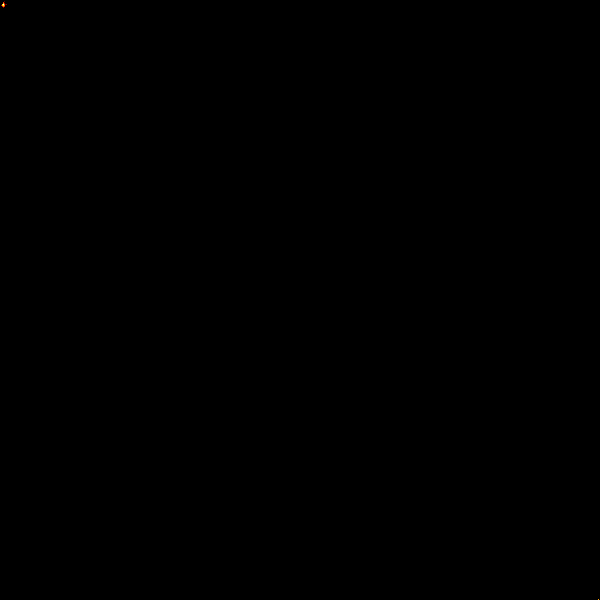

In [115]:
agg = ds.Canvas().points(nyctaxi_small, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

In [136]:
df = pd.DataFrame(nyctaxi_small,columns=['dropoff_longitude','dropoff_latitude'])
df = df.dropna()
print(df)

      dropoff_longitude  dropoff_latitude
0            -73.982227         40.731790
1            -73.960449         40.763995
2            -73.986626         40.765217
3            -73.979863         40.777050
4            -73.984367         40.720524
...                 ...               ...
9995         -73.990344         40.739028
9996         -73.975818         40.763701
9997         -73.973647         40.787233
9998         -73.973057         40.751087
9999         -73.975406         40.752156

[9999 rows x 2 columns]


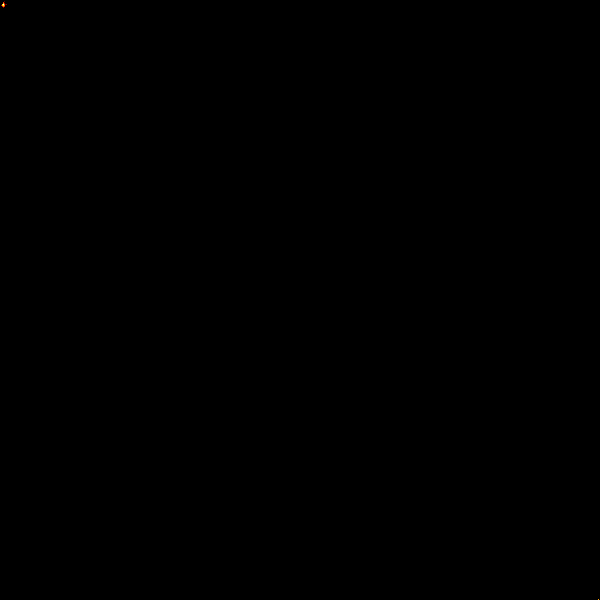

In [137]:
agg1 = ds.Canvas().points(df, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

In [138]:
nyctaxi_small = pd.read_csv('nyc_taxi_data_2014.csv', nrows=10000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])